In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path = 'C:\\Users\\Caroline\\Documents\\School\\Intro to Data Science\\Term Project\\'

ps_north = pd.read_csv(path + '519.csv', index_col = 0) #one sm diff from Lisa's code: uses first col as row index
print('Length:', len(ps_north))
print(ps_north.columns)

#converts date columns to the datetime type
def convert_to_datetime(df, columns):
    'converts date columns to the datetime type'
    for column in columns:
        df[column] = pd.to_datetime(df[column], infer_datetime_format=True)

convert_to_datetime(ps_north, ['last_reported','weather_ts','traffic_0_asof','traffic_1_asof','traffic_2_asof'])

Length: 4789
Index(['eightd_has_available_keys', 'is_installed', 'is_renting',
       'is_returning', 'last_reported', 'num_bikes_available',
       'num_bikes_disabled', 'num_docks_available', 'num_docks_disabled',
       'station_id', 'weather_ts', 'apparentTemperature', 'cloudCover',
       'dewPoint', 'humidity', 'icon', 'nearestStormBearing',
       'nearestStormDistance', 'ozone', 'precipIntensity',
       'precipIntensityError', 'precipProbability', 'precipType', 'pressure',
       'summary', 'temperature', 'time', 'visibility', 'windBearing',
       'windSpeed', 'traffic_0_asof', 'traffic_0_distance', 'traffic_0_linkId',
       'traffic_0_speed', 'traffic_0_travel_time', 'traffic_1_asof',
       'traffic_1_distance', 'traffic_1_linkId', 'traffic_1_speed',
       'traffic_1_travel_time', 'traffic_2_asof', 'traffic_2_distance',
       'traffic_2_linkId', 'traffic_2_speed', 'traffic_2_travel_time', 'y_10m',
       'y_15m', 'y_30m', 'y_45m', 'y_60m', 'y_90m', 'y_120m'],
      dtype

,eightd_has_available_keys,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,station_id,...,traffic_2_linkId,traffic_2_speed,traffic_2_travel_time,y_10m,y_15m,y_30m,y_45m,y_60m,y_90m,y_120m
522,True,1,1,1,2016-10-17 13:41:47,6,5,50,0,519,...,4616332.0,45.98,148.0,0.107143,0.017857,0.053571,0.178571,0.196429,0.196429,-1.000000
779,True,1,1,1,2016-10-17 13:49:11,2,5,54,0,519,...,4616332.0,39.77,169.0,0.017857,0.035714,0.142857,0.142857,0.250000,0.232143,0.285714
1135,True,1,1,1,2016-10-17 13:54:57,6,5,50,0,519,...,4616332.0,44.74,151.0,0.035714,0.053571,0.178571,0.142857,0.214286,0.232143,0.200000
1375,True,1,1,1,2016-10-17 13:59:48,1,5,55,0,519,...,4616332.0,44.74,153.0,0.053571,0.053571,0.178571,-1.000000,0.196429,-1.000000,0.218182
1413,True,1,1,1,2016-10-17 14:00:22,0,5,56,0,519,...,4616332.0,44.74,153.0,0.053571,0.142857,0.178571,0.250000,0.196429,-1.000000,0.218182
1671,True,1,1,1,2016-10-17 14:06:28,2,5,54,0,519,...,4616332.0,44.12,154.0,0.142857,0.142857,0.142857,0.232143,0.196429,0.232143,0.200000
2029,True,1,1,1,2016-10-17 14:14:01,3,5,53,0,519,...,4616332.0,42.25,162.0,-1.000000,0.178571,0.196429,-1.000000,0.196429,-1.000000,0.200000
2293,True,1,1,1,2016-10-17 14:19:35,8,5,48,0,519,...,4616332.0,44.12,154.0,0.178571,-1.000000,0.250000,0.196429,0.232143,0.285714,-1.000000
2389,True,1,1,1,2016-10-17 14:22:17,8,5,48,0,519,...,4616332.0,45.98,148.0,0.142857,0.142857,0.232143,0.196429,0.232143,0.200000,-1.000000
2733,True,1,1,1,2016-10-17 14:29:34,10,5,46,0,519,...,4616332.0,42.25,164.0,0.142857,-1.000000,0.196429,0.196429,-1.000000,0.218182,0.200000


In [148]:
#drop obs w stale traffic data
ps_north['delta_t0'] = (ps_north['traffic_0_asof'] - ps_north['last_reported'])/np.timedelta64(1,'m')
ps_north['delta_t0'] = (ps_north['traffic_0_asof'] - ps_north['last_reported'])/np.timedelta64(1,'m')
ps_north['delta_t1'] = (ps_north['traffic_1_asof'] - ps_north['last_reported'])/np.timedelta64(1,'m')
ps_north['delta_t2'] = (ps_north['traffic_2_asof'] - ps_north['last_reported'])/np.timedelta64(1,'m')
ps_north['nonstale'] = (ps_north['delta_t0'] > -15) & (ps_north['delta_t1'] > -15) & (ps_north['delta_t2'] > -15)

nonstale = ps_north[ps_north['nonstale'] == True]

#drop rows with no value within the 60m target variable period
y60 = nonstale[nonstale['y_60m'] >= 0]

In [149]:
#not sure why this is creating a warning, appears to work fine
y60.loc[:,'target_60'] = 1 #neutral = 1
y60.loc[y60['y_60m']<= 0.05,'target_60'] = 0 #empty=0
y60.loc[y60['y_60m']>= 0.95,'target_60'] = 2 #full=2

C:\Users\Caroline\Anaconda3\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Caroline\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [150]:
#Distribution of class variables
y60.groupby(['target_60']).agg('count')

,eightd_has_available_keys,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,station_id,...,y_15m,y_30m,y_45m,y_60m,y_90m,y_120m,delta_t0,delta_t1,delta_t2,nonstale
target_60,,,,,,,,,,,,,,,,,,,,,
0,605,605,605,605,605,605,605,605,605,605,...,605,605,605,605,605,605,605,605,605,605
1,1806,1806,1806,1806,1806,1806,1806,1806,1806,1806,...,1806,1806,1806,1806,1806,1806,1806,1806,1806,1806
2,139,139,139,139,139,139,139,139,139,139,...,139,139,139,139,139,139,139,139,139,139


In [151]:
#do we want to have is_installed, is_renting, is_returning in this list?

#Select variables to be used in first prelim model
y60 = y60[['last_reported','num_bikes_available','num_docks_available','num_bikes_disabled','num_docks_disabled',\
                    'is_installed','is_renting','is_returning','apparentTemperature','traffic_0_speed','precipType','summary',\
                    'traffic_0_distance','traffic_1_speed','traffic_1_distance','traffic_2_speed','traffic_2_distance','target_60']]

In [152]:

#Create indicator variables

#get day of week and hour from timestamp
y60['dow'] = y60['last_reported'].dt.dayofweek
y60['hour'] = y60['last_reported'].dt.hour
y60['min'] = y60['last_reported'].dt.minute
y60.drop('last_reported', axis=1)

#create dummies
cat_vars = ['dow','hour','min','precipType','summary']
y60_dum = y60
for var in cat_vars:
    dummy_df = pd.get_dummies(y60_dum[var],prefix=var)
    y60_dum = pd.concat([y60_dum,dummy_df], axis=1) #this also didn't add dummy vars to my df
    y60_dum = y60_dum.drop(var,axis=1)

In [233]:
for column in y60_dum:
    if y60_dum.loc[:,column].dtype not in ('int64', 'float64'):
        print (column)

In [154]:
y60_dum = y60_dum.drop('last_reported', axis =1)

In [155]:
from sklearn import preprocessing
#scale the data
for column in y60_dum.columns:
    if column != 'target_60':
        y60_dum[column] = preprocessing.scale(np.array(y60_dum[column])) #scale the features

C:\Users\Caroline\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\Caroline\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. See section Preprocessing data for more details on scaling and normalization.
In SVC, if data for classification are unbalanced (e.g. many positive and few negative), set class_weight='balanced' and/or try different penalty parameters C.

In [234]:
#Split into Test and Training
data_rand = y60_dum.iloc[np.random.permutation(len(y60_dum))]
train_df = data_rand[0:int(.8*len(y60_dum))]
test_df = data_rand[int(.8*len(y60_dum)):]

Multiclass

In [167]:
from sklearn import svm

lin_clf = svm.LinearSVC()
lin_clf.fit(train_df.drop('target_60', 1), train_df['target_60'])
dec = lin_clf.decision_function(test_df.drop('target_60', 1))
dec #this is outputting a confidence score that the target variable is equal to each category, not a probability, highest val is the one that is predicted

array([[ -4.70012281e+00,   1.08034498e+00,  -1.32326297e+00],
       [  2.42733861e-01,  -8.07214376e-02,  -3.26215640e+00],
       [ -6.03173907e-01,   5.85116266e-01,  -3.88630339e+00],
       ..., 
       [ -2.41582936e+00,   9.41884507e-01,  -1.51053197e+00],
       [  2.32240471e-01,  -3.00134623e-03,  -3.86916325e+00],
       [  3.52325435e-01,  -2.41959834e-01,  -4.13367533e+00]])

In [235]:
for i in test_df.index:
    test_df.loc[i, 'empty_as_binary'] = int(test_df.loc[i, 'target_60'] in (1,2))*-1 + 1

C:\Users\Caroline\Anaconda3\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Caroline\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [236]:
test_df.groupby(['empty_as_binary']).agg('count')

,num_bikes_available,num_docks_available,num_bikes_disabled,num_docks_disabled,is_installed,is_renting,is_returning,apparentTemperature,traffic_0_speed,traffic_0_distance,...,min_58,min_59,precipType_rain,summary_Clear,summary_Drizzle,summary_Light Rain,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Rain
empty_as_binary,,,,,,,,,,,,,,,,,,,,,
0.0,401,401,401,401,401,401,401,401,401,401,...,401,401,401,401,401,401,401,401,401,401
1.0,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109


In [237]:
for i in test_df.index:
    test_df.loc[i, 'full_as_binary'] = int(test_df.loc[i, 'target_60'] in (0,1))*-1 + 1

C:\Users\Caroline\Anaconda3\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Caroline\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [238]:
test_df.groupby(['full_as_binary']).agg('count')

,num_bikes_available,num_docks_available,num_bikes_disabled,num_docks_disabled,is_installed,is_renting,is_returning,apparentTemperature,traffic_0_speed,traffic_0_distance,...,min_59,precipType_rain,summary_Clear,summary_Drizzle,summary_Light Rain,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Rain,empty_as_binary
full_as_binary,,,,,,,,,,,,,,,,,,,,,
0.0,479,479,479,479,479,479,479,479,479,479,...,479,479,479,479,479,479,479,479,479,479
1.0,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31


In [265]:
my_svm = svm.SVC(kernel='linear', probability=True, decision_function_shape = 'ovr')
my_svm.fit(train_df.drop(['target_60','empty_as_binary','full_as_binary'], 1), train_df['target_60'])
prob_svm = my_svm.decision_function(test_df.drop(['target_60','empty_as_binary','full_as_binary'], 1))
prob_svm


array([[ 1.87294931,  0.89404339,  0.2330073 ],
       [ 1.87307079,  0.80267424,  0.32425497],
       [ 0.13401505,  1.84172084,  1.02426411],
       ..., 
       [ 1.06161699,  1.8624965 ,  0.07588651],
       [ 1.8632659 ,  0.77105568,  0.36567842],
       [ 1.02849015,  1.63789584,  0.33361401]])

In [266]:
prob_svm_scaled = prob_svm/3
prob_svm_scaled

array([[ 0.62431644,  0.29801446,  0.0776691 ],
       [ 0.62435693,  0.26755808,  0.10808499],
       [ 0.04467168,  0.61390695,  0.34142137],
       ..., 
       [ 0.35387233,  0.62083217,  0.0252955 ],
       [ 0.62108863,  0.25701856,  0.12189281],
       [ 0.34283005,  0.54596528,  0.11120467]])

In [267]:
roc_auc_score(test_df['empty_as_binary'], prob_svm_scaled[:,0])

0.80180283236861971

In [268]:
roc_auc_score(test_df['full_as_binary'], prob_svm_scaled[:,2])

0.82524075695333021

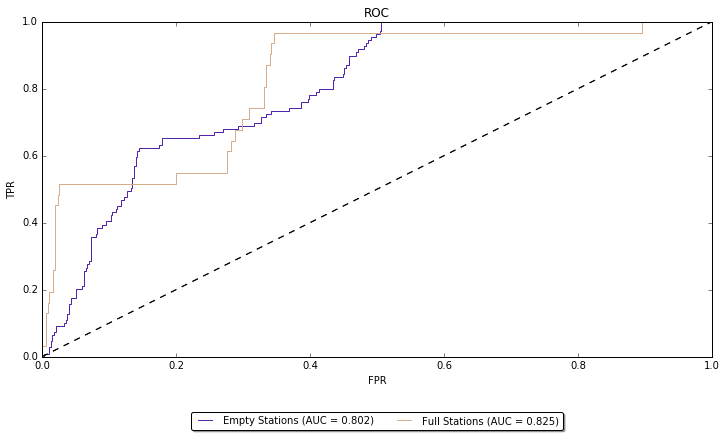

In [269]:
from sklearn.metrics import roc_curve, auc

def plotROC(preds, truth, label_string):
    '''
    preds is an nx1 array of predictions
    truth is an nx1 array of truth labels
    label_string is text to go into the plotting label
    '''
    #Student input code here
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)

    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())

    #create a plot and set some options
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

roc_auc_score(test_df['empty_as_binary'], prob_svm_scaled[:,0])
roc_auc_score(test_df['full_as_binary'], prob_svm_scaled[:,2])

auc_dict = {} #empty mapping
auc_dict['Empty Stations'] = plotROC(prob_svm_scaled[:,0], test_df['empty_as_binary'], 'Empty Stations')
auc_dict['Full Stations'] = plotROC(prob_svm_scaled[:,2], test_df['full_as_binary'], 'Full Stations')

# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

Two classes

In [247]:
for i in train_df.index:
    train_df.loc[i, 'full_as_binary'] = int(train_df.loc[i, 'target_60'] in (0,1))*-1 + 1
for i in train_df.index:
    train_df.loc[i, 'empty_as_binary'] = int(train_df.loc[i, 'target_60'] in (1,2))*-1 + 1

C:\Users\Caroline\Anaconda3\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Caroline\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [248]:
train_df.groupby(['target_60']).agg('count')

,num_bikes_available,num_docks_available,num_bikes_disabled,num_docks_disabled,is_installed,is_renting,is_returning,apparentTemperature,traffic_0_speed,traffic_0_distance,...,precipType_rain,summary_Clear,summary_Drizzle,summary_Light Rain,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Rain,full_as_binary,empty_as_binary
target_60,,,,,,,,,,,,,,,,,,,,,
0,496,496,496,496,496,496,496,496,496,496,...,496,496,496,496,496,496,496,496,496,496
1,1436,1436,1436,1436,1436,1436,1436,1436,1436,1436,...,1436,1436,1436,1436,1436,1436,1436,1436,1436,1436
2,108,108,108,108,108,108,108,108,108,108,...,108,108,108,108,108,108,108,108,108,108


In [249]:
train_df.groupby(['full_as_binary']).agg('count')

,num_bikes_available,num_docks_available,num_bikes_disabled,num_docks_disabled,is_installed,is_renting,is_returning,apparentTemperature,traffic_0_speed,traffic_0_distance,...,min_59,precipType_rain,summary_Clear,summary_Drizzle,summary_Light Rain,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Rain,empty_as_binary
full_as_binary,,,,,,,,,,,,,,,,,,,,,
0.0,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,...,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932
1.0,108,108,108,108,108,108,108,108,108,108,...,108,108,108,108,108,108,108,108,108,108


In [250]:
train_df.groupby(['empty_as_binary']).agg('count')

,num_bikes_available,num_docks_available,num_bikes_disabled,num_docks_disabled,is_installed,is_renting,is_returning,apparentTemperature,traffic_0_speed,traffic_0_distance,...,min_59,precipType_rain,summary_Clear,summary_Drizzle,summary_Light Rain,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Rain,full_as_binary
empty_as_binary,,,,,,,,,,,,,,,,,,,,,
0.0,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,...,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544
1.0,496,496,496,496,496,496,496,496,496,496,...,496,496,496,496,496,496,496,496,496,496


In [253]:
#SVM for empty

my_svm = svm.SVC(kernel='linear')
my_svm.fit(train_df.drop(['target_60', 'empty_as_binary', 'full_as_binary'], 1), train_df['empty_as_binary'])
prob_svm_empty = my_svm.decision_function(test_df.drop(['target_60', 'empty_as_binary', 'full_as_binary'], 1))
prob_svm_empty

array([  1.16316421e+00,   6.63424491e-01,  -1.88662385e+00,
         4.52554816e-01,  -1.45902405e-01,  -6.28407087e+00,
         1.14022618e+00,  -1.10294160e+00,  -2.52054749e+00,
        -1.13215663e+00,  -6.41350497e-02,  -1.56814823e+00,
         3.58704765e-01,  -2.92034120e+00,  -3.07908829e+00,
         4.82843717e-01,  -3.43336427e+00,  -3.47286091e+00,
         1.54600062e+00,   1.15844246e+00,  -3.09476017e+00,
        -2.76277976e+00,  -1.52336070e+00,  -3.00487985e+00,
        -1.33586965e+00,  -8.47255447e-01,   6.13209945e-01,
        -7.81696426e+00,   4.81982063e-01,  -6.87065575e+00,
        -6.83699188e+00,  -6.69573243e+00,  -1.54928382e+00,
        -6.88703113e+00,   6.42702090e-01,  -7.82964089e-01,
        -4.24611794e+00,   1.38415713e+00,  -6.48041919e-01,
        -2.29498465e+00,  -6.74657277e+00,  -7.09994335e+00,
        -1.70668319e-01,   4.53183777e-01,   4.80268150e-01,
        -2.60799524e+00,  -8.55336521e+00,  -2.05680417e+00,
         6.39570841e-01,

In [251]:
test_df.drop(['target_60', 'empty_as_binary', 'full_as_binary'], 1).shape

(510, 111)

In [252]:
train_df.drop(['target_60', 'empty_as_binary', 'full_as_binary'], 1).shape #why on earth would the training set have so many more features?

(2040, 111)

In [254]:
#SVM for full

my_svm = svm.SVC(kernel='linear')
my_svm.fit(train_df.drop(['target_60', 'empty_as_binary', 'full_as_binary'], 1), train_df['full_as_binary'])
prob_svm_full = my_svm.decision_function(test_df.drop(['target_60', 'empty_as_binary', 'full_as_binary'], 1))
prob_svm_full

array([ -4.42819628,  -6.74224768,  -2.98790129,  -6.50537871,
        -5.15065025,  -1.16581885,  -6.7307912 ,  -4.76360619,
        -1.73190098,  -6.06275407,  -7.85923883,  -5.17317531,
        -2.30548256,  -1.73763744,  -6.92536133,  -7.17372116,
        -1.83776588,  -1.47385156,  -6.24367775,  -7.2855661 ,
        -0.78575712,  -1.72284237,  -3.44677796,  -2.07282938,
        -4.9386695 ,  -4.95135702,  -8.04829918,  -2.18750653,
        -3.06491047,  -2.7085609 ,  -2.07933084,   0.19472813,
        -5.12683513,  -1.38219572,  -5.26226259,  -3.40073192,
        -0.08321653,  -8.47400553,  -5.4125858 ,  -4.6397336 ,
        -2.08874189,  -1.72239466,  -6.57168448,  -4.41269138,
        -6.1985829 ,  -3.21100999,  -2.16862492,  -5.03713927,
        -3.5555423 ,  -6.67648309,  -3.51439982,  -4.12348923,
        -4.75324835,  -1.41246555,  -7.62257968,  -6.50004504,
        -4.85438082,  -4.2454637 ,  -5.61281748,  -6.36763221,
        -4.71516835,  -3.66445386,  -6.81543457,  -3.22

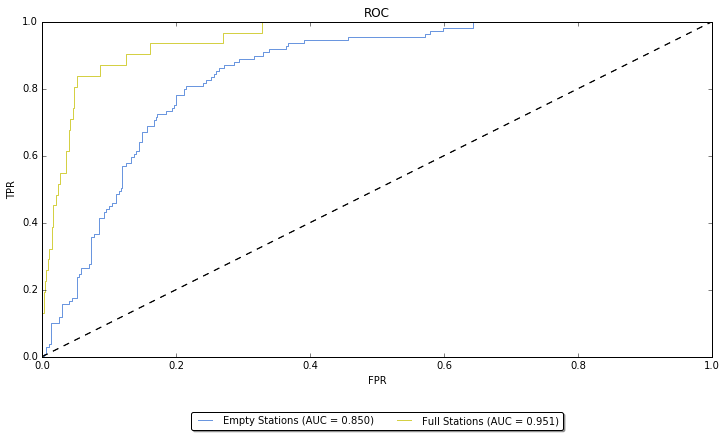

In [255]:
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

roc_auc_score(test_df['empty_as_binary'], prob_svm_empty)
roc_auc_score(test_df['full_as_binary'], prob_svm_full)

auc_dict = {} #empty mapping
auc_dict['Empty Stations'] = plotROC(prob_svm_empty, test_df['empty_as_binary'], 'Empty Stations')
auc_dict['Full Stations'] = plotROC(prob_svm_full, test_df['full_as_binary'], 'Full Stations')

# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})